Logistic Regression for Binary Classfiaction

In [1]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve , roc_auc_score , precision_score, accuracy_score, recall_score

In [2]:
#loading the dataset
dataset = pd.read_csv("/Users/rakshit/Downloads/churn-bigml-80.csv")
dataset.shape

(2666, 20)

In [3]:
#first 5 rows of dataset
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
#label encoding in the dataset
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
dataset["State_n"] = label_encode.fit_transform(dataset["State"])
dataset["International plan_n"] = label_encode.fit_transform(dataset["International plan"])
dataset["Voice mail plan_n"] = label_encode.fit_transform(dataset["Voice mail plan"])
dataset["Churn_n"] = label_encode.fit_transform(dataset["Churn"])

In [7]:
#dropping the old columns from the dataset
dataset_n = dataset.drop(["State","International plan","Voice mail plan","Churn"],axis=1)
dataset_n.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,State_n,International plan_n,Voice mail plan_n,Churn_n
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,16,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,35,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,31,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,35,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,36,1,0,0


In [8]:
#labelling the data
x = dataset_n.drop(columns="Churn_n",axis=1)
y = dataset_n["Churn_n"]

In [9]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [10]:
standardized_data = scaler.transform(x)
x = standardized_data

In [40]:
#splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x.shape,x_train.shape,x_test.shape)

(2666, 19) (1866, 19) (800, 19)


In [45]:
#training the model
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [46]:
#prediction using training data
x_train_predict = model.predict(x_train)

#predcition using testing data
x_test_predict = model.predict(x_test)

In [47]:
#accuracy , precision , recall 
def accuracy_precision_recall(true,pred):
    
    accuracy_value = accuracy_score(true,pred)
    precision_value = precision_score(true,pred)
    recall_value = recall_score(true,pred)

    print("Accuracy score: ",accuracy_value*100,"%")
    print("Precision score: ",precision_value*100,"%")
    print("Recall score: ",recall_value*100,"%")

In [48]:
#for training data
accuracy_precision_recall(x_train_predict,y_train)

Accuracy score:  86.38799571275455 %
Precision score:  25.357142857142854 %
Recall score:  61.206896551724135 %


In [51]:
#for testing data
accuracy_precision_recall(x_test_predict,y_test)

Accuracy score:  85.5 %
Precision score:  16.666666666666664 %
Recall score:  40.909090909090914 %


In [49]:
model.intercept_

array([-2.26461247])

In [54]:
model.coef_

array([[ 0.06838264, -0.02898846,  0.48948841,  0.31368306, -0.00705053,
         0.31266521,  0.15091506, -0.03086473,  0.15198018,  0.06787123,
        -0.05604727,  0.06668873,  0.17124706, -0.21893493,  0.17809643,
         0.67774144,  0.0553544 ,  0.65784097, -0.85529981]])

In [ ]:
#evaluating using roc curve using testing data
probs_test = model.predict_proba(x_test)
probs_test = probs_test[:,1]

In [ ]:
auc_value_test = roc_auc_score(y_test,probs_test)

In [ ]:
print("AUROC: ",auc_value_test*100,"%")

AUROC:  81.34232498394348 %


In [ ]:
fpr,tpr ,_ = roc_curve(y_test,probs_test)

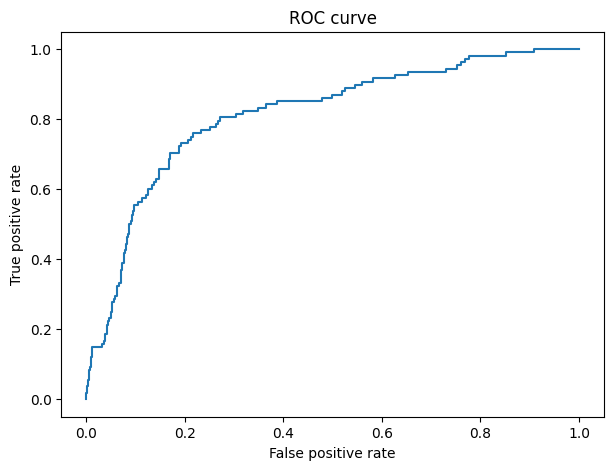

In [63]:
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [65]:
#evaluating using roc curve using training data
probs_train = model.predict_proba(x_train)
probs_train = probs_train[:,1]

In [67]:
auc_value_train = roc_auc_score(y_train,probs_train)
print("AUROC: ",auc_value_train*100,"%")


AUROC:  82.4045217078004 %


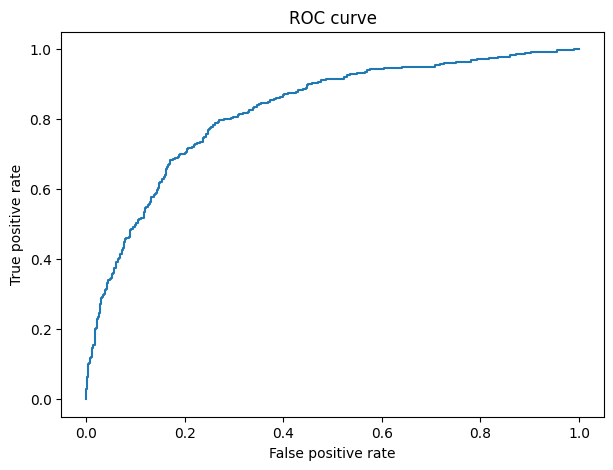

In [68]:
fpr_train, tpr_train, _ = roc_curve(y_train,probs_train)

plt.figure(figsize=(7,5))
plt.plot(fpr_train,tpr_train)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()